In [ ]:
class class_vide:
  pass

In [ ]:
class class_vide:
  pass
c1 = class_vide() 

In [3]:
print(type(c1)) # AFFICHE TYPE INSTANCE 
isinstance(c1, class_vide) #TRUE

<class '__main__.class_vide'>


True

In [4]:
rnd = 42

class exemple_classe:
  def method1(self,n):
    """simule la génération d'un nombre aléatoire compris entre 0 et 1"""
    global rnd
    rnd= 397204094 * rnd % 2147483647
    return int (rnd % n)


nb = exemple_classe()
l = [nb.method1(100) for i in range(0,10)]
print(l) #affiche [19, 46, 26, 88, 44, 56, 56, 26, 0, 8]

[19, 46, 26, 88, 44, 56, 56, 26, 0, 8]


In [5]:
(397204094 * 42 % 2147483647) % 100

19

In [6]:
(397204094 * (397204094 * 42 % 2147483647) % 2147483647) % 100

46

In [29]:
import urllib.request
import re

def list_url(site, root, nbpage = 100): 
  s = "\"(" + root + "[-_~a-zA-Z0-9/.?,]*?)\""
  exp = re.compile(s, re.IGNORECASE)
  
  res = [ ] #résultat 
  pile = [site] # page à explorer 
  
  while len(pile) > 0 and len(res) < nbpage:
    
    # on bascule toutes les pages de pile vers res 
      for u in pile:
          if u not in res: res.append(u)
    
      u = pile.pop() # on s'interesse à la première page
    
      try: 
          f = urllib.request.urlopen(u) # accès à l'url 
          text = f.read().decode('utf-8')       # on lit son contenu
          f.close() # fin de l'accès 
         
          liens = exp.findall(text) #recherche de tous les liens 
        
          for u in liens: 
              if u in pile or u in res: continue # on passe au suivant si déjà vu         
              # on enlève les images et autres fichiers indésirables 
              if ".gif" in u or ".png" in u or ".jpg" in u : continue
              if ".cs" in u or ".css" in u or ".js" in u : continue 
              
              # on ajoute le lien à la liste des liens à explorer 
              pile.append(u)  
      except IOError:
          print("problème avec url", u)
          continue
     
    
  return res        
              

In [30]:
url1="http://www.lemonde.fr/" #un journal français 
url2="https://www.usatoday.com/" #un journal américain 


In [33]:
res = list_url(url2,url2)
for r in res :
  print(r)

https://www.usatoday.com/
https://www.usatoday.com/money/at-home/
https://www.usatoday.com/money/
https://www.usatoday.com/sports/
https://www.usatoday.com/sports/nfl/
https://www.usatoday.com/entertainment/
https://www.usatoday.com/opinion/
https://www.usatoday.com/tech/
https://www.usatoday.com/travel/
https://www.usatoday.com/travel/usa-today-eats/
https://www.usatoday.com/sports/fantasy/
https://www.usatoday.com/sports/soccer/
https://www.usatoday.com/pages/interactives/podcasts/
https://www.usatoday.com/sports/odds/
https://www.usatoday.com/sports/mlb/odds/
https://www.usatoday.com/sports/nba/odds/
https://www.usatoday.com/sports/ncaab/odds/
https://www.usatoday.com/sports/ncaaf/odds/
https://www.usatoday.com/super-bowl/
https://www.usatoday.com/sports/nfl/odds/
https://www.usatoday.com/sports/nhl/odds/
https://www.usatoday.com/story/sports/nba/warriors/2019/07/09/shaun-livingston-waived-golden-state-warriors/1690064001/
https://www.usatoday.com/story/sports/soccer/2019/07/09/mega

In [16]:
import urllib.request

def lit_url(nom):
  f=urllib.request.urlopen(nom)
  res=f.read().decode('utf-8')
  f.close()
  return res

def lit_fichier(nom):
  f = open(nom, "r")
  l = f.readlines()
  f.close()
  return "".join(l)

In [3]:
def compte_lettre(texte):
  texte = texte.upper()
  res = {}
  for c in texte:
    if not("A" <= c <= "Z"): continue
    if c not in res: res[c] = 1
    else: res[c] += 1
  s=sum(res.values())
  for k in res:
    res[k] = float(res[k])/s
  return res  

In [17]:
def langue_lettre(texte):
    if "http" in texte: s=lit_url(texte)
    else: s=lit_fichier(texte)
    c=compte_lettre(s)
    return c.get("W", 0.0), c.get("H", 0.0)

langue_lettre("c1.txt")


(0.023940173017314523, 0.06151963605820681)

In [19]:
def curve(li):
    cx, cy = [], []
    for l in li:
        x,y=langue_lettre(l)
        cx.append(x)
        cy.append(y)
    return cx, cy  

li = ["c1.txt","c2.txt"]
curve(li)

([0.023940173017314523, 6.807537305304433e-06],
 [0.06151963605820681, 0.010408724539810479])

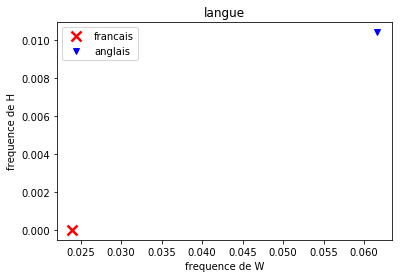

In [27]:
#c1 = ("https://www.gutenberg.org/dirs/etext04/pgjr10.txt")

#c2 = ("https://archive.org/stream/ledernierjourdun00hugouoft/ledernierjourdun00hugouoft_djvu.txt")

#fr = ("c1.txt")
#en = ("c2.txt") 
li = ["c1.txt","c2.txt"]
frcx, frcy = [0.023940173017314523, 6.807537305304433e-06]
encx, ency = [0.06151963605820681, 0.010408724539810479]

import pylab 

pylab.plot(frcx, frcy, "rx", ms=10, mew=2.5)
pylab.plot(encx, ency, "bv")
pylab.legend(("francais","anglais"), loc=2)
pylab.title("langue")
pylab.xlabel("frequence de W")
pylab.ylabel("frequence de H")
pylab.savefig("graphe.png")
pylab.show()

In [ ]:
c1 = compte_lettre(lit_url("https://www.gutenberg.org/dirs/etext04/pgjr10.txt")) 

c2 = compte_lettre(lit_url("https://archive.org/stream/ledernierjourdun00hugouoft/ledernierjourdun00hugouoft_djvu.txt"))

car = c1.keys()

sorted(car)
for k in car : 
  print(k, ":", "% 2.2f" % (c1[k]*100), "%", "%2.2f" % (c2[k]*100), "%") 

In [36]:
def langue_lettre(texte):
    if "http" in texte: s=lit_url(texte)
    else: s=lit_fichier(texte)
    c=compte_lettre(s)
    return c.get("W", 0.0), c.get("H", 0.0)

In [38]:
res = list_url(url2,url2)

for r in res:
    print(langue_lettre(r))

(0.013864092106158736, 0.03226228684220171)
(0.015120310301033193, 0.024353825558644834)
(0.015331153797338164, 0.03221161631413329)
(0.014197691035625903, 0.03317441937020499)
(0.0138435383328386, 0.03241724139260367)
(0.013192530563211081, 0.03182637269450922)
(0.01312185603551673, 0.031547054295483434)
(0.015172123307505331, 0.03398151966935477)
(0.01299703567412859, 0.028667075539200653)
(0.013482583154875341, 0.031523212636790504)
(0.015263176552609708, 0.0323500565229893)
(0.015883247918001282, 0.032270980140935296)
(0.013216358954214132, 0.02672078914058749)
(0.013633355393778954, 0.019501433928965365)
(0.013540178267673675, 0.019799959175341907)
(0.013529745042492918, 0.01978470254957507)
(0.013506481753806475, 0.019818556141263773)
(0.013509538141250482, 0.019823040890679097)
(0.015432098765432098, 0.033397295321637425)
(0.013537414965986394, 0.01979591836734694)
(0.013540485370832389, 0.02016330233613064)
(0.015144717766118712, 0.029189117715116855)
(0.01569730868447873, 0.02

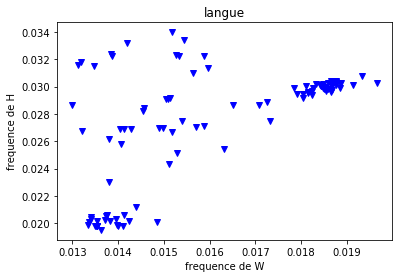

In [42]:
import pylab

res = [(0.013864092106158736, 0.03226228684220171),
(0.015120310301033193, 0.024353825558644834),
(0.015331153797338164, 0.03221161631413329),
(0.014197691035625903, 0.03317441937020499),
(0.0138435383328386, 0.03241724139260367),
(0.013192530563211081, 0.03182637269450922),
(0.01312185603551673, 0.031547054295483434),
(0.015172123307505331, 0.03398151966935477),
(0.01299703567412859, 0.028667075539200653),
(0.013482583154875341, 0.031523212636790504),
(0.015263176552609708, 0.0323500565229893),
(0.015883247918001282, 0.032270980140935296),
(0.013216358954214132, 0.02672078914058749),
(0.013633355393778954, 0.019501433928965365),
(0.013540178267673675, 0.019799959175341907),
(0.013529745042492918, 0.01978470254957507),
(0.013506481753806475, 0.019818556141263773),
(0.013509538141250482, 0.019823040890679097),
(0.015432098765432098, 0.033397295321637425),
(0.013537414965986394, 0.01979591836734694),
(0.013540485370832389, 0.02016330233613064),
(0.015144717766118712, 0.029189117715116855),
(0.01569730868447873, 0.027059448863054513),
(0.015177584989042436, 0.02666642517764536),
(0.013964344641635477, 0.02030262787234899),
(0.01587700839861843, 0.02711606534849052),
(0.018759660322782278, 0.03038735442498359),
(0.019330437167014523, 0.03077006750922898),
(0.01823099763505465, 0.02970708379576634),
(0.01844632577040298, 0.03006027768371148),
(0.014886569817708016, 0.026996748700088894),
(0.014400472284888992, 0.02114739927048852),
(0.013399894902785077, 0.020453534904401955),
(0.015387507690905362, 0.02750495636123328),
(0.01912404020624591, 0.030098812862167496),
(0.01867925986530892, 0.030096287866875963),
(0.018158849502164964, 0.029610733585785382),
(0.014004564161579122, 0.019797538473541515),
(0.01823885305334526, 0.029388742407834643),
(0.018040961328568066, 0.02942624178740343),
(0.01964765601672141, 0.03026575097043894),
(0.014986092959351228, 0.026976307764485105),
(0.01875636181472264, 0.030094381351822342),
(0.013363546569054674, 0.020045319853582013),
(0.013412244733068051, 0.02030015957339366),
(0.018652070008849136, 0.030426189201935152),
(0.014062552491013538, 0.02582725837336648),
(0.014101461736887361, 0.019814655584217064),
(0.013731060606060606, 0.02055713383838384),
(0.01842992454647616, 0.030007491839246534),
(0.018667128636345464, 0.030127530283445052),
(0.018853277143174006, 0.03026532538808808),
(0.014573510501500214, 0.028410497274258494),
(0.018478390917671457, 0.030224798266487645),
(0.0185767499074757, 0.030273419298838852),
(0.018335071503064418, 0.030164149892138236),
(0.013719572727633722, 0.020212047810030578),
(0.01803818224064047, 0.029188149446619276),
(0.018852975072562745, 0.029870774287177736),
(0.018545874446692638, 0.029645831274414444),
(0.018584418605272938, 0.029797632765899425),
(0.01783538206737271, 0.02989075106741829),
(0.014127596554815075, 0.020558088779765383),
(0.017260621193205462, 0.028874891234441796),
(0.014545794542321718, 0.028216704288939052),
(0.014240132356416923, 0.020148900969038052),
(0.016312722506597706, 0.025416674046653324),
(0.014858462863631025, 0.02008535296190439),
(0.018648339454828525, 0.02963549148295013),
(0.013968067391517288, 0.019825644039572925),
(0.018664054994158335, 0.030435210739083802),
(0.018664033865754204, 0.02975696181987855),
(0.01876192608227531, 0.03033089215090558),
(0.013760747516783793, 0.02057241568842998),
(0.017912493858313568, 0.029474029006957544),
(0.01840190453277682, 0.03010101744795965),
(0.01850405495046327, 0.029821004429418183),
(0.01853463602061232, 0.03000037148876777),
(0.017082119922049728, 0.02861825950683629),
(0.01595736136500175, 0.031330015709985316),
(0.015089163237311385, 0.029084015351181394),
(0.017316605727800357, 0.02747006293240543),
(0.015050218119103176, 0.029111291467992288),
(0.01527696365767878, 0.025131887456037515),
(0.01562828049548604, 0.031007243334033173),
(0.01825337663190785, 0.029874873974300754),
(0.018862193202108888, 0.030267731676651134),
(0.01870328155648624, 0.030270900705084026),
(0.01847624983505855, 0.029905639453433167),
(0.018153667282532995, 0.029552950114827413),
(0.016503374085890955, 0.028625612935407666),
(0.01335017489312087, 0.019879518072289156),
(0.01866835501918778, 0.030038892406289975),
(0.013823331085637222, 0.02014993455237793),
(0.018106901353854104, 0.03004608559573888),
(0.018519893899204245, 0.029893899204244033),
(0.01843686376914225, 0.03006882358148181),
(0.014043852345267832, 0.026905356647238414),
(0.014137166198172874, 0.026879831342234716),
(0.014290554571884495, 0.026870614466522395),
(0.013807382023274077, 0.026136931534232882),
(0.013797532401821508, 0.023041295294438175)]
for x,y in res:
    pylab.plot(x, y , "bv")

pylab.title("langue")
pylab.xlabel("frequence de W")
pylab.ylabel("frequence de H")
pylab.savefig("graphe.png")
pylab.show()